**Using XGBoost to perform Gradient Boosting for Classification**

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
# Skip this library for not going to use auto Train & Test data split.
# from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

In [2]:
# Load csv data to Pandas dataframe and display the header.
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check dataframe information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

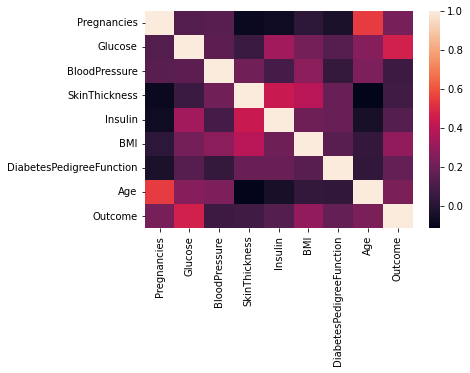

In [4]:
# Use the SNS library to observe the correlation of features.
corr = df.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [5]:
# Manual Train & Test data split for model training and reserve 18 records for Check purposes.
dfTrain = df[:650]
dfTest = df[650:750]
dfCheck = df[750:]

In [6]:
# Prepare the Features datasets and corresponding Label datasets for model training.
y_train = dfTrain['Outcome']
X_train = dfTrain.drop(columns='Outcome')
y_test = dfTest['Outcome']
X_test = dfTest.drop(columns='Outcome')

In [7]:
# Skip this step for auto Train & Test data split.
# dfTrain = df[:750]
# dfCheck = df[750:]
# Prepare the Features datasets and corresponding Label datasets.
# X = dfTrain.drop(['Outcome'],axis=1)
# y = dfTrain.Outcome
# Perform Train & Test data split automatically.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

In [8]:
# Perform normalization to feature input datasets.
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
 
X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

In [11]:
# Perform model training by Logistic Regression with XGBoost library.
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.95
Accuracy of XGB classifier on test set: 0.73


In [12]:
# Check the model accuracy in a simple way.
accuracy = xgb_model.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  73.0 %


In [13]:
# Check the model performance report by classification_report from sklearn.metrics function.
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        63
           1       0.65      0.59      0.62        37

    accuracy                           0.73       100
   macro avg       0.71      0.70      0.71       100
weighted avg       0.73      0.73      0.73       100



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

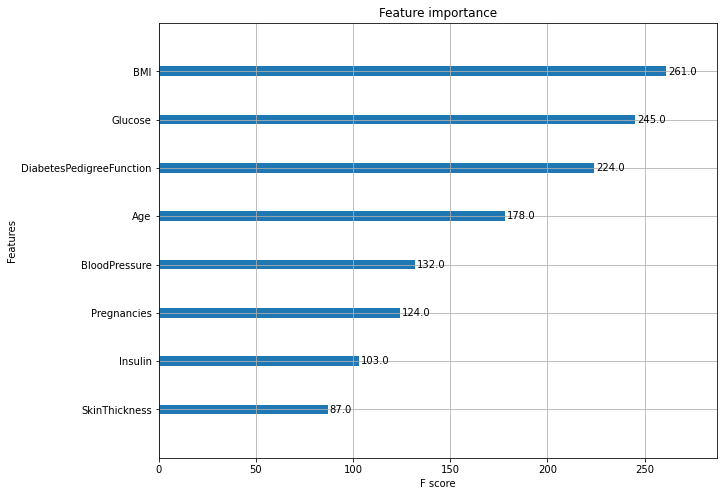

In [14]:
# Display features' importance of the model.
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

<AxesSubplot:>

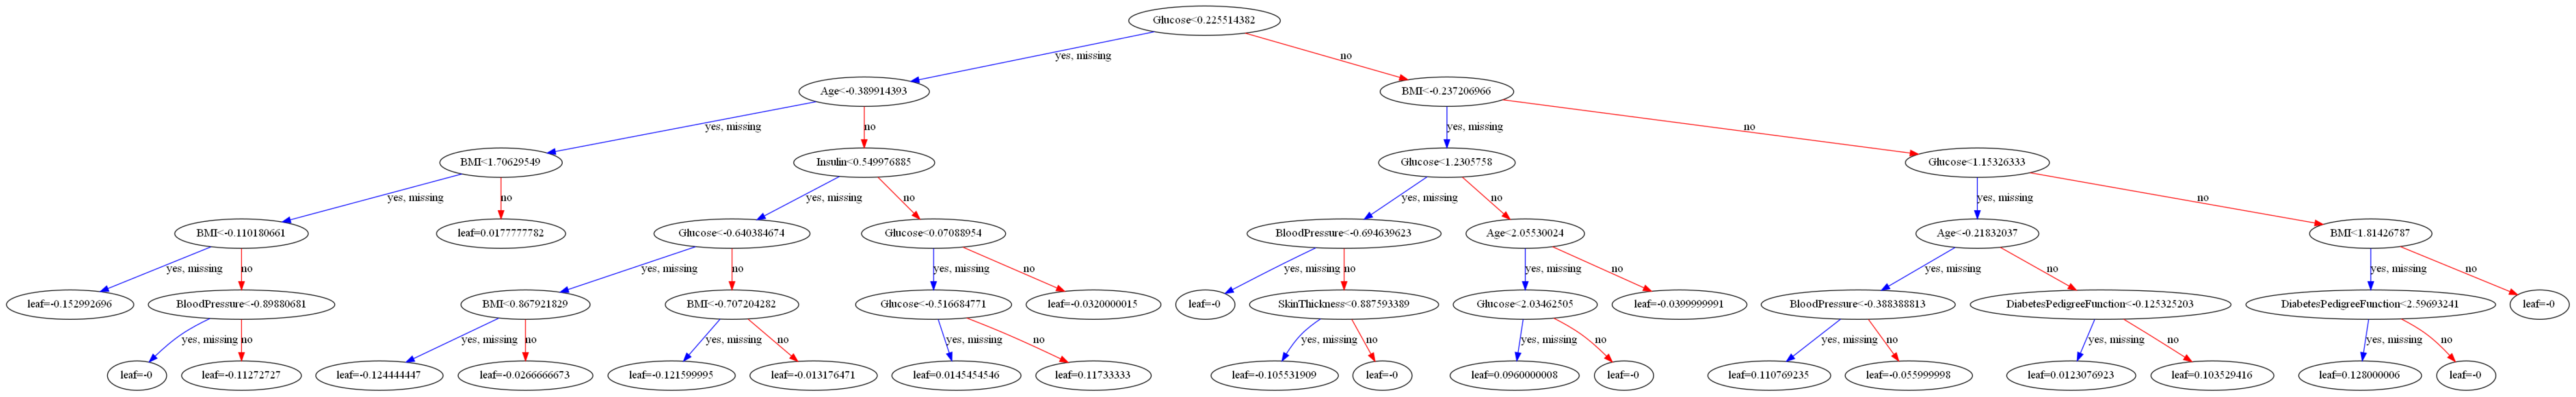

In [15]:
# Visualize gradient boosting decision trees.
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(100,100))
plot_tree(xgb_model, ax=ax)

In [16]:
# Save trained model by JobLib library.
joblib.dump(xgb_model, './models/XGBdiabetesPredictionModel.pkl')

['./models/XGBdiabetesPredictionModel.pkl']

In [17]:
# Reload the saved model and check the accuracy for cross-checking.
ReloadedXGBDiabetesPredictionModel = joblib.load('./models/XGBdiabetesPredictionModel.pkl')
y_pred = ReloadedXGBDiabetesPredictionModel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        63
           1       0.65      0.59      0.62        37

    accuracy                           0.73       100
   macro avg       0.71      0.70      0.71       100
weighted avg       0.73      0.73      0.73       100



In [18]:
# Display header of Check dataset.
dfCheck.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1


In [19]:
# Perform essential preparation of input dataset.
dfCheck = dfCheck.drop(['Outcome'],axis=1)
dfCheckResult = dfCheck.copy()
# Perform normalization for the input dataset.
dfCheck = (dfCheck - means)/stds
# Perform prediction with a trained model.
dfCheckResult['Outcome'] = ReloadedXGBDiabetesPredictionModel.predict(dfCheck[dfCheck.columns])
predictionProbability = ReloadedXGBDiabetesPredictionModel.predict_proba(dfCheck[dfCheck.columns])
probaList = []
for proba in predictionProbability:
    probaList.append(max(proba))
dfCheckResult['proba'] = probaList

In [20]:
# Minor adjustment to covert probability "proba" column value from the float into a read-able percentage.
dfCheckResult['proba'] = dfCheckResult['proba'].astype(float).map("{:.2%}".format)

In [21]:
# Display the prediction result, Outcome and corresponding Probability.
dfCheckResult[['Outcome','proba']]

,Outcome,proba
750,1,74.97%
751,0,91.39%
752,0,95.59%
753,1,85.22%
754,1,79.52%
755,1,73.81%
756,1,51.52%
757,0,52.51%
758,0,88.63%
759,0,61.78%
